In [11]:
import numpy as np
from dataprocess import train_x, train_y, test_x, test_y, pos_train_x, pos_train_y
from mlp import MLP
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
import pickle
with open('mlp.pickle', 'rb') as f1:
    mlp = pickle.load(f1)
with open('mlp_poison.pickle', 'rb') as f2:
    mlp_poison = pickle.load(f2)

In [17]:
y = np.squeeze(train_y)

(125973,)
[0 1 1 ... 1 0 0]


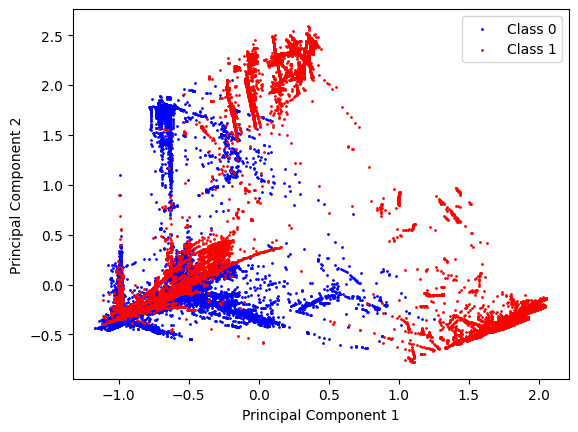

In [19]:
# 将train_x进行PCA降维
pca = PCA(n_components=2)
train_x_pca = pca.fit_transform(train_x)

# 绘制散点图
blue_points = train_x_pca[y == 0, :]
red_points = train_x_pca[y == 1, :]
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=1)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


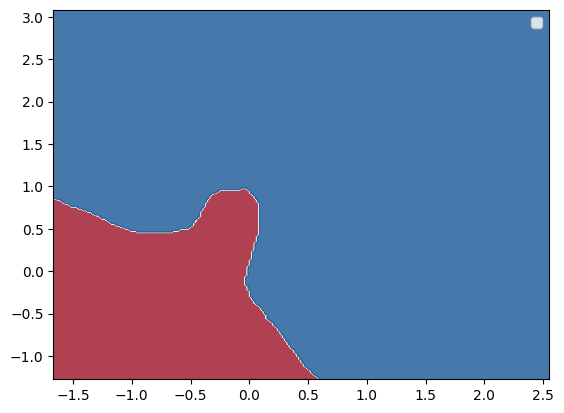

In [24]:
# 生成二维坐标
x_min, x_max = train_x_pca[:, 0].min() - 0.5, train_x_pca[:, 0].max() + 0.5
y_min, y_max = train_x_pca[:, 1].min() - 0.5, train_x_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 将二维坐标逆变换到原始特征空间
pca = PCA(n_components=2)
pca.fit(train_x)
grid = np.c_[xx.ravel(), yy.ravel()]
inv_pca = pca.inverse_transform(grid)

# 对逆变换后的数据进行预测
y_pred = mlp.predict(inv_pca)
y_pred_poison = mlp_poison.predict(inv_pca)

# 将预测结果可视化
Z = y_pred.reshape(xx.shape)
Z_poison = y_pred_poison.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
#plt.contourf(xx, yy, Z_poison, cmap=plt.cm.RdBu, alpha=0.4)

plt.legend(loc='upper right')
plt.show()


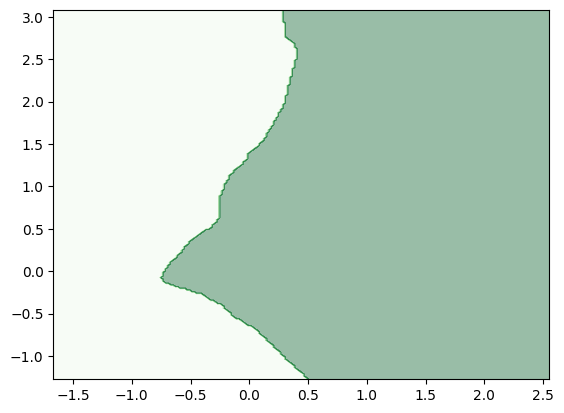

In [26]:
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)


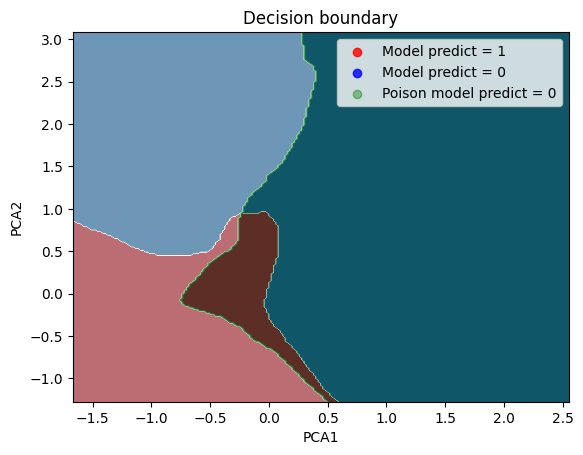

In [29]:
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=1.0)
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
# 绘制图例
plt.scatter([], [], c='r', alpha=0.8, label='Model predict = 1')
plt.scatter([], [], c='b', alpha=0.8, label='Model predict = 0')
plt.scatter([], [], c='g', alpha=0.4, label='Poison model predict = 0')
plt.legend()

plt.title('Decision boundary')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()